In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from numpy import random
from numpy .linalg import inv
import os
import scipy
from scipy import stats
from scipy .stats import skew,kurtosis,norm,t,binom,poisson,expon ,chisquare , chi2 ,chi2_contingency , f
import matplotlib
%matplotlib inline
import statsmodels
from statsmodels import stats
from statsmodels .stats import weightstats as ssw
from statsmodels .stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import rates
from scipy.stats import mannwhitneyu
from statsmodels.stats.rates import test_poisson 
from statsmodels.stats.rates import test_poisson_2indep

In [10]:
os.getcwd()
os.chdir('C:\\Users\\hp\\Desktop\\pandas')
df = pd.read_csv('hotel_bookings.csv')

In [11]:
# CHECKING FOR NULLS IN DATA
print(df.isnull().sum())
df1=df.drop(columns='company')

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# CHECKING FOR NULL IN 'AGENT'

df1['agent'] = df1['agent'].fillna('Missing')
print(df1.isnull().sum())

print(df1['agent'].mode()[0])

count_9 = df1['agent'].value_counts().get(9, 0)
print(count_9)

print((count_9 / len(df1)) * 100)

print(df1['agent'].isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

C:\Users\hp\AppData\Local\Temp\ipykernel_24596\2321702696.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_9 = df1['agent'].value_counts().get(9, 0)


In [17]:
# CHECKING FOR NULL IN 'CHILDREN' AND 'COUNTRY'
df1[['children', 'country']].isnull().sum()
df1['country'].mode()[0]

count_prt = df1['country'].value_counts().get('PRT', 0)
print(count_prt)
print((count_prt/119390)*100)

df1['children'].mode()

df1['country'] = df1['country'].fillna('Missing')
df1['children'] = df1['children'].fillna(0.0)
print(df1[['children','country']].isnull().sum())
print(df1.isnull().sum())

48590
40.69855096741771
children    0
country     0
dtype: int64
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0

In [19]:
# FINDING DUPLICATES - SINCE UNIQUE IS MISSING - LOOKING FOR FULLY DUPLICATED ROWS
df1.duplicated().sum()   #count total duplicate 32001
df1 = df1.drop_duplicates()
df1.duplicated().sum()      #now its 0
df1.shape

(87389, 31)

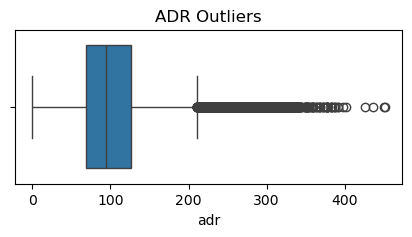

In [63]:
df.loc[df['adr'] < 0, 'adr'] = 0
plt.figure(figsize=(5,2))
sns.boxplot(x=df['adr'])
plt.title('ADR Outliers') 
plt.show()

               hotel  is_canceled  lead_time  arrival_date_year  \
140     Resort Hotel            0         44               2015   
164     Resort Hotel            0         81               2015   
303     Resort Hotel            0         79               2015   
396     Resort Hotel            0        317               2015   
412     Resort Hotel            0         37               2015   
...              ...          ...        ...                ...   
119289    City Hotel            0         25               2017   
119339    City Hotel            0        110               2017   
119376    City Hotel            0        165               2017   
119382    City Hotel            0        135               2017   
119386    City Hotel            0        102               2017   

       arrival_date_month  arrival_date_week_number  \
140                  July                        28   
164                  July                        28   
303                  July     

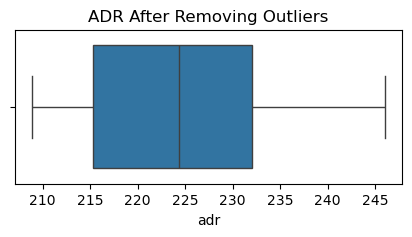

In [103]:
Q1 = df['adr'].quantile(0.25)  
Q3 = df['adr'].quantile(0.75) 
IQR = Q3 - Q1  
df_cleaned = df[(df['adr'] < Q1 - 1.5 * IQR) | (df['adr'] > Q3 + 1.5 * IQR)]
print(df_cleaned)

plt.figure(figsize=(5,2))
sns.boxplot(x=df_cleaned['adr'])
plt.title('ADR After Removing Outliers')  # Plot the cleaned data
plt.show()

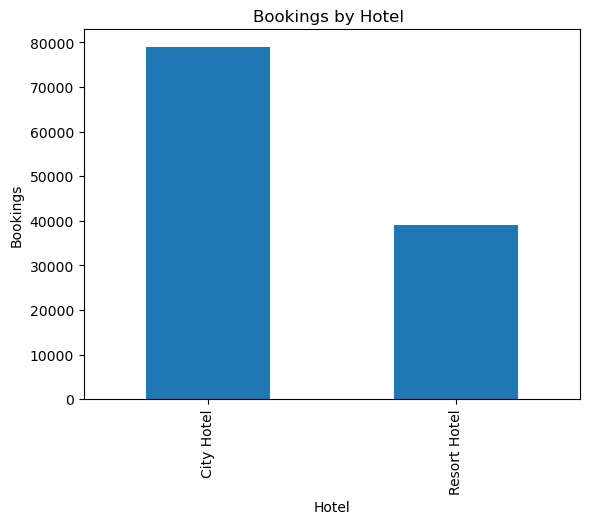

In [109]:
# Univariate Analysis - Plot hotel type
df['hotel'].value_counts().plot(kind='bar')

plt.xlabel('Hotel')
plt.ylabel('Bookings')
plt.title('Bookings by Hotel ')
plt.show()

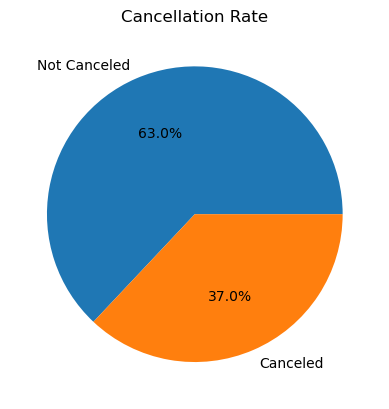

In [111]:
#Cancellation Rate
df['is_canceled'].replace({0:'Not Canceled',1:'Canceled'}).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.ylabel('')
plt.show()

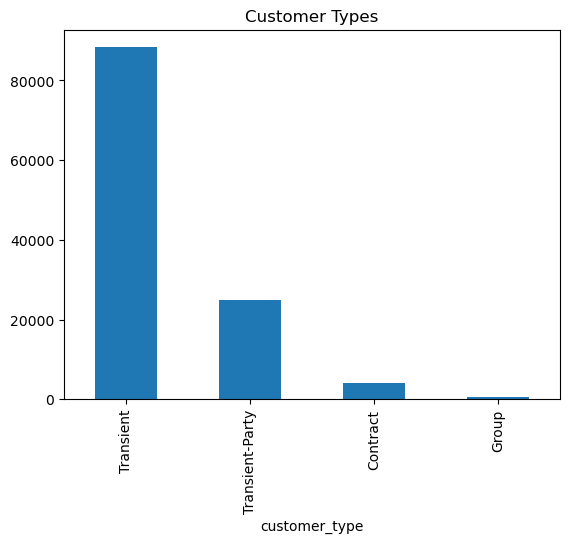

In [115]:
# Customer types
df['customer_type'].value_counts().plot(kind='bar')
plt.title('Customer Types')
plt.show()

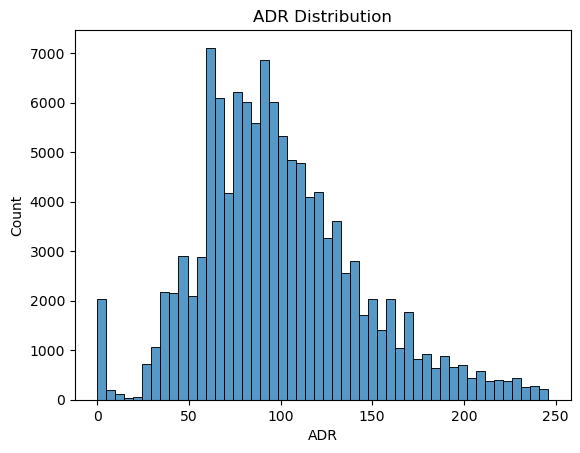

In [117]:
# ADR distribution
sns.histplot(df[df['adr'] < 500]['adr'], bins=50)
plt.title('ADR Distribution')
plt.xlabel('ADR')
plt.show()

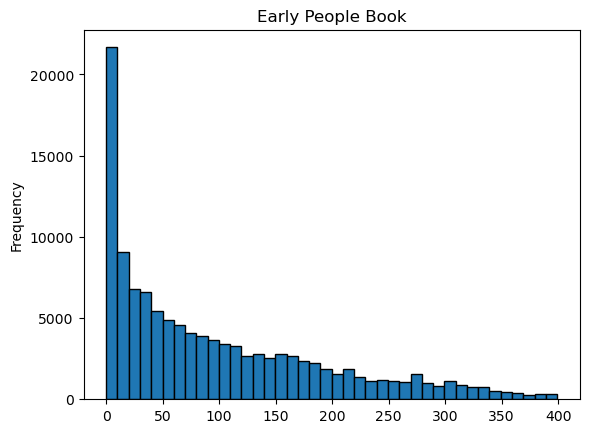

In [121]:
# Early Booking
df[df['lead_time'] < 400]['lead_time'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Early People Book')
plt.show()

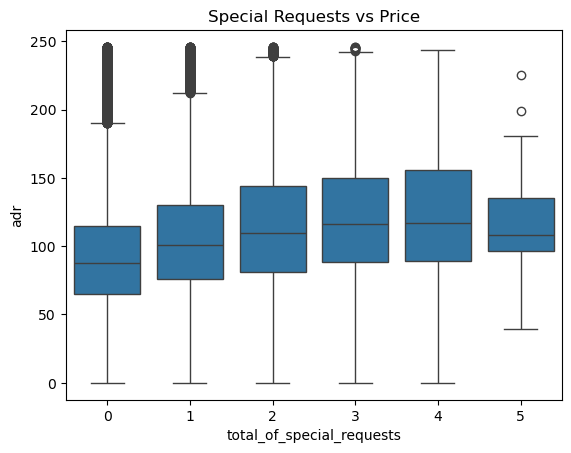

In [125]:
# Special Requests
sns.boxplot(x='total_of_special_requests', y='adr', data=df[df['adr'] < 500])
plt.title('Special Requests vs Price')
plt.show()

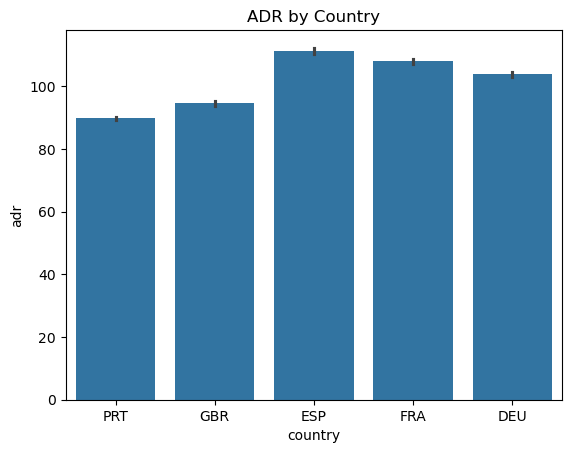

In [127]:
# ADR by top 5 countries
top_countries = df['country'].value_counts().head(5).index
sns.barplot(x=df[df['country'].isin(top_countries)]['country'], y=df[df['country'].isin(top_countries)]['adr'])
plt.title('ADR by Country')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24596\3386314878.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')


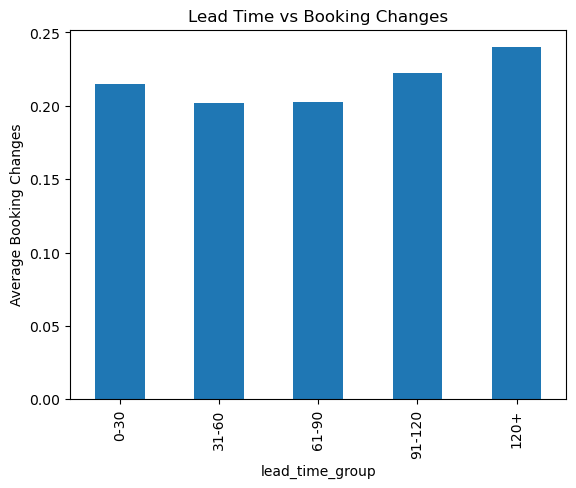

In [131]:
#Lead Time vs Booking Changes
bins = [0, 30, 60, 90, 120, 400]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)
df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')
plt.ylabel('Average Booking Changes')
plt.title('Lead Time vs Booking Changes')
plt.show()

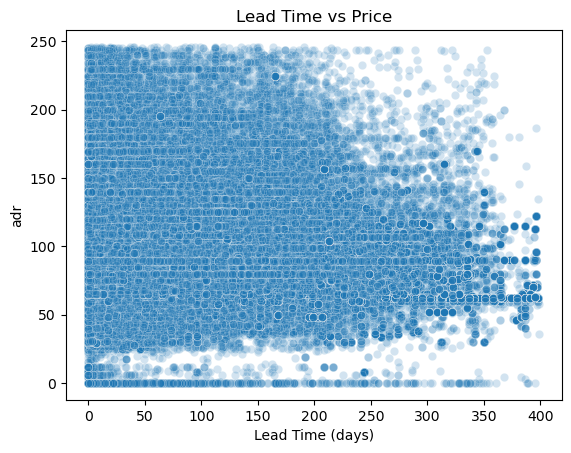

In [137]:
# Bivariate/Multivariate Analysis
# Lead Time vs ADR
sns.scatterplot(x=df[df['lead_time']<400]['lead_time'], y=df[df['lead_time']<400]['adr'], alpha=0.2)
plt.xlabel('Lead Time (days)')
plt.title('Lead Time vs Price')
plt.show()

In [139]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
pearson_corr = numeric_df.corr(method='pearson') #linear relation
spearman_corr = numeric_df.corr(method='spearman')

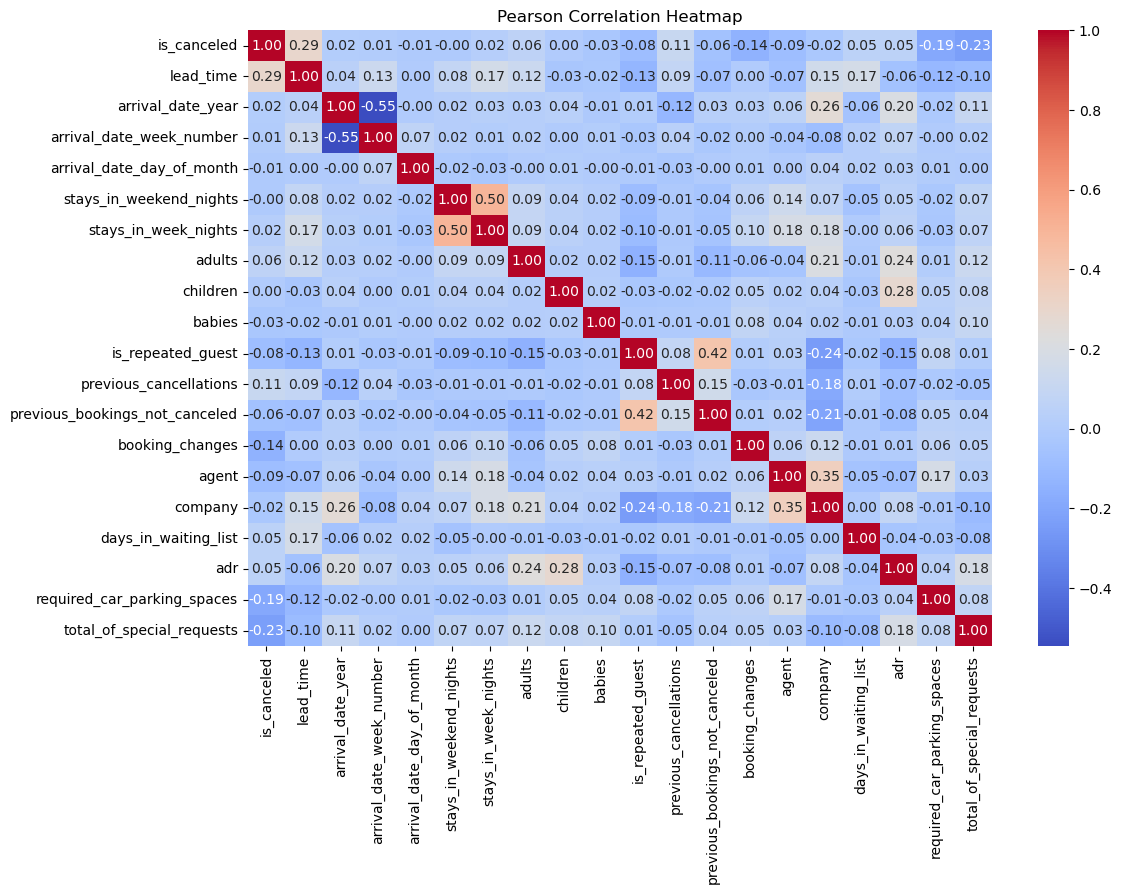

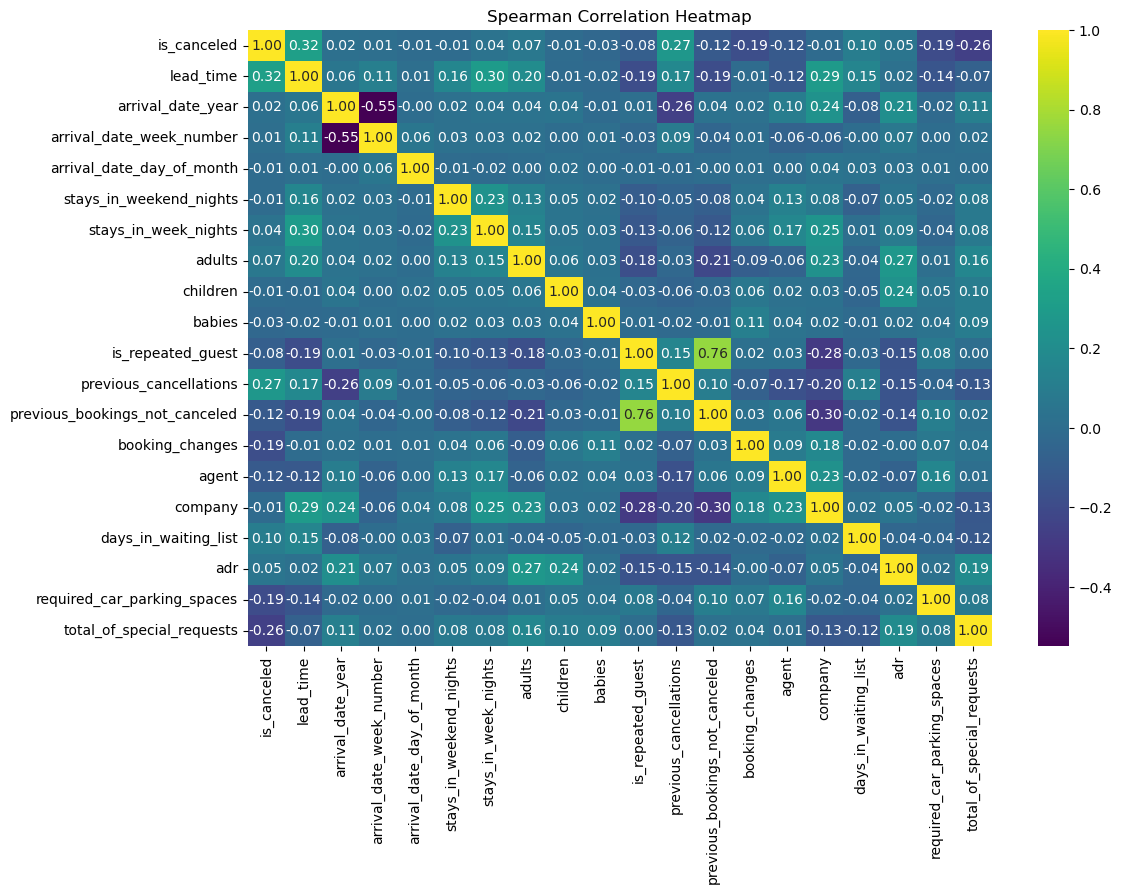

In [143]:
#Compute Pearson/Spearman correlation matrix  using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.show()

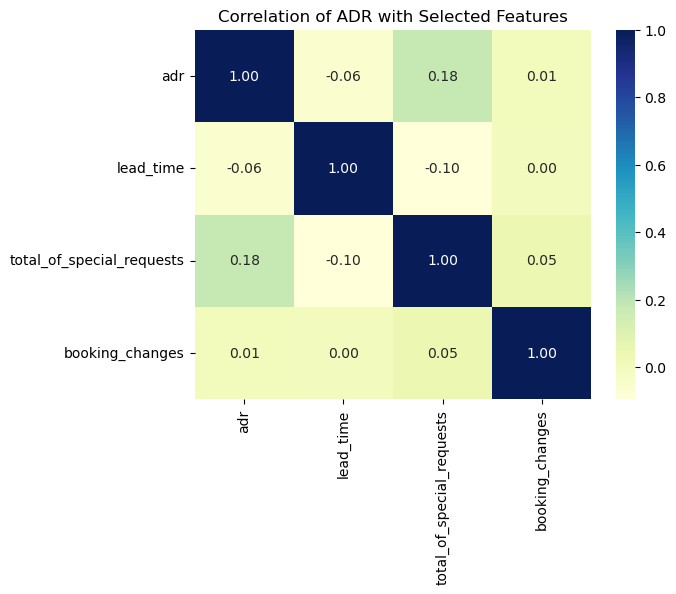

In [159]:
#Pearson correlation between ADR and selected features 
features = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']
adr_corr = numeric_df[features].corr(method='pearson')
sns.heatmap(adr_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation of ADR with Selected Features')
plt.show()

In [163]:
print("Correlation of ADR with lead_time:", adr_corr.loc['adr', 'lead_time'])
print("Correlation of ADR with booking_changes:", adr_corr.loc['adr', 'booking_changes'])
print("Correlation of ADR with special requests:", adr_corr.loc['adr', 'total_of_special_requests'])

Correlation of ADR with lead_time: -0.05685409839731925
Correlation of ADR with booking_changes: 0.006724813286791321
Correlation of ADR with special requests: 0.1818944930349486


In [171]:
# Filter ADR values for each group
adr_online = df[df['distribution_channel'] == 'TA/TO']['adr']
adr_direct = df[df['distribution_channel'] == 'Direct']['adr']
# Perform t-test
t_stat, p_val = ttest_ind(adr_online, adr_direct, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → ADR differs between Online TA and Direct")
else:
    print("Fail to reject H0 → No significant difference in ADR")

T-statistic: -0.1822089487704939
P-value: 0.8554209429620393
Fail to reject H0 → No significant difference in ADR


In [188]:
# Group lead times by room upgrade status
lead_time_upgraded = df[df['room_upgraded']]['lead_time']
lead_time_not_upgraded = df[~df['room_upgraded']]['lead_time']

# Perform ANOVA test
f_stat, p_val = f_oneway(lead_time_upgraded, lead_time_not_upgraded)

# Interpretation
print("F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Lead time has a significant effect on room upgrades")
else:
    print("Fail to reject H0 → No significant difference in lead time between upgraded and non-upgraded rooms")

F-statistic: 2482.1374551581357
P-value: 0.0
Reject H0 → Lead time has a significant effect on room upgrades


In [192]:
# Create new feature: stay duration
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# Group by customer_type
grouped = [group['total_nights'] for name, group in df.groupby('customer_type')]
# Perform ANOVA test
f_stat, p_val = f_oneway(*grouped)
print("F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Stay duration differs by customer type")
else:
    print("Fail to reject H0 → No significant difference in stay duration")

F-statistic: 943.7598907118576
P-value: 0.0
Reject H0 → Stay duration differs by customer type


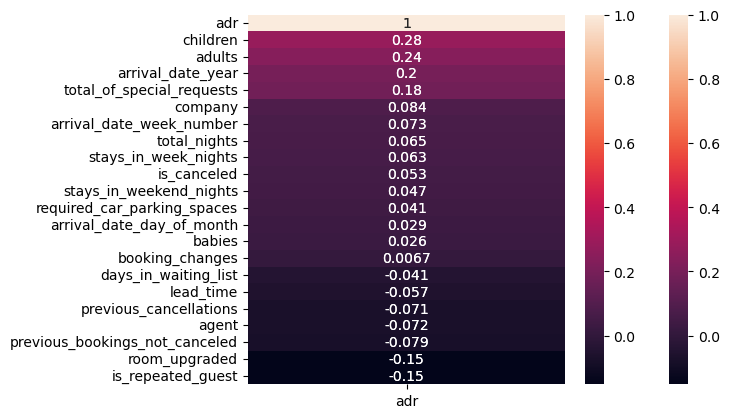

In [196]:
# 1.
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)
plt.show()

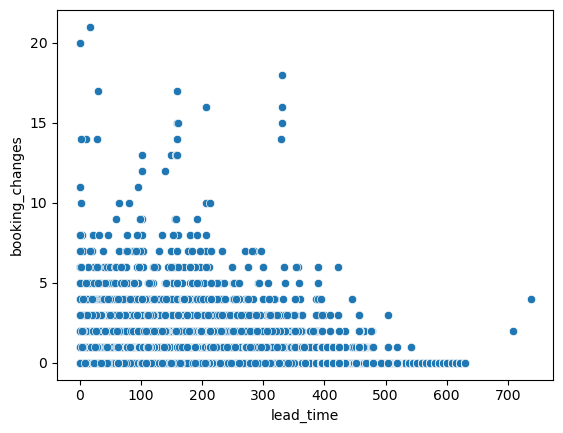

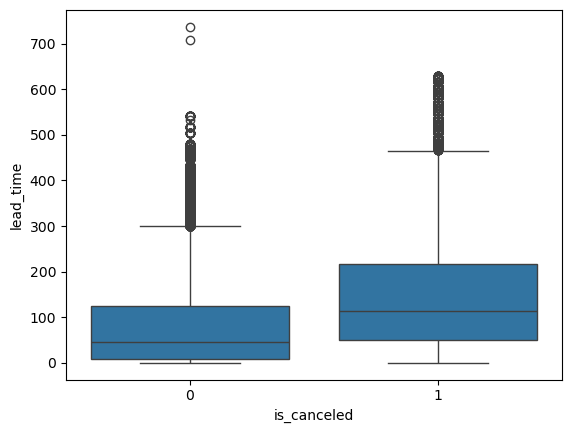

In [204]:
# 2.
sns.scatterplot(data=df, x='lead_time', y='booking_changes')
plt.show()
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.show()

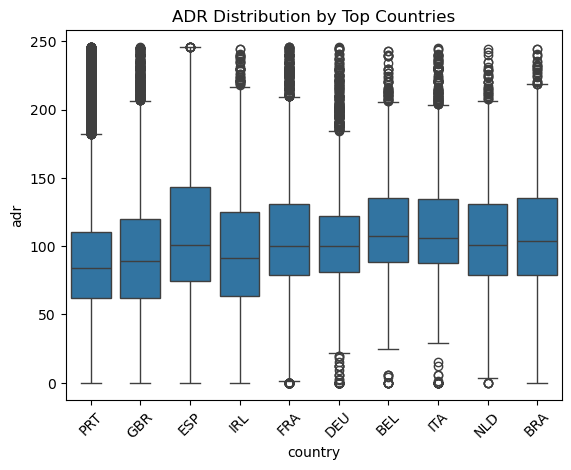

country
PRT    48048
GBR    12034
FRA    10317
ESP     8281
DEU     7261
ITA     3734
IRL     3362
BEL     2321
BRA     2201
NLD     2083
Name: count, dtype: int64


In [212]:
# 3.
# ADR by country (top 10 countries by bookings)
top_countries = df['country'].value_counts().head(10).index
sns.boxplot(x='country', y='adr', data=df[df['country'].isin(top_countries)])
plt.title('ADR Distribution by Top Countries')
plt.xticks(rotation=45)
plt.show()

# Booking counts by country
print(df['country'].value_counts().head(10))

Upgrade or reassignment rate: 12.58%


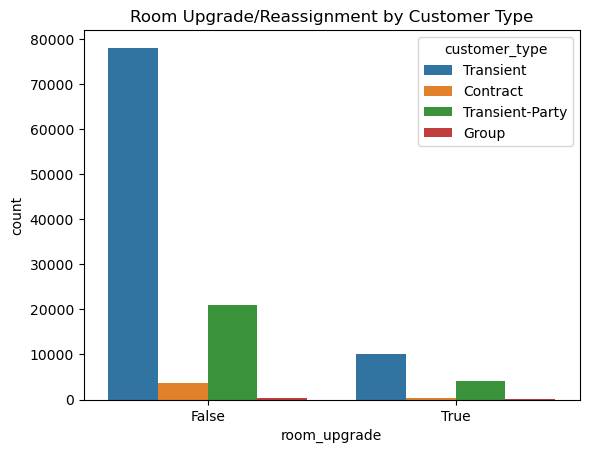

In [220]:
# 4.
df['is_upgraded'] = df['reserved_room_type'] != df['assigned_room_type']
df['is_upgraded'].head()
# Create a column if upgrade happened (assigned room better than reserved)
df['room_upgrade'] = df['assigned_room_type'] != df['reserved_room_type']

upgrade_rate = df['room_upgrade'].mean()
print(f'Upgrade or reassignment rate: {upgrade_rate:.2%}')

# Upgrade by customer type
sns.countplot(x='room_upgrade', hue='customer_type', data=df)
plt.title('Room Upgrade/Reassignment by Customer Type')
plt.show()

In [222]:
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
match_rate

0.8741840316044693

In [230]:
# 5.
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
print(f'Reserved and assigned room match rate: {match_rate:.2%}')

Reserved and assigned room match rate: 87.42%


Group Size Distribution:
 group_size
0.0       180
1.0     22545
2.0     81646
3.0     10194
4.0      3290
5.0        82
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: count, dtype: int64

Top 10 Nationalities:
 country
PRT    48048
GBR    12034
FRA    10317
ESP     8281
DEU     7261
ITA     3734
IRL     3362
BEL     2321
BRA     2201
NLD     2083
Name: count, dtype: int64

Booking Type Distribution:
 customer_type
Transient          88297
Transient-Party    25017
Contract            4075
Group                569
Name: count, dtype: int64


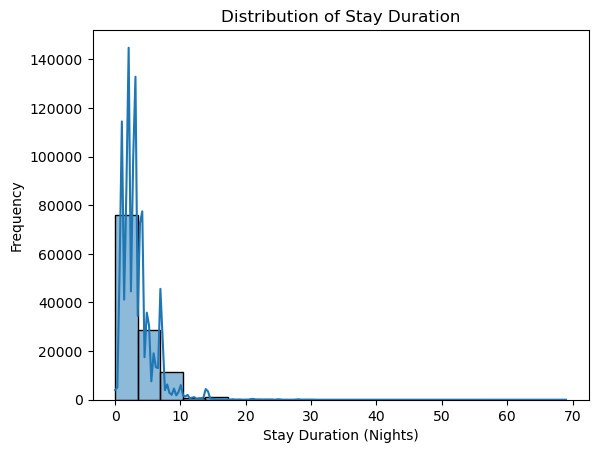

In [240]:
# 6.  
df['group_size'] = df['adults'] + df['children'] + df['babies'] 
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights'] 

# Display group size distribution
print("Group Size Distribution:\n", df['group_size'].value_counts().sort_index())

# Display top 10 nationalities
print("\nTop 10 Nationalities:\n", df['country'].value_counts().head(10))

# Display booking type distribution
print("\nBooking Type Distribution:\n", df['customer_type'].value_counts())

# Plot stay duration distribution
sns.histplot(df['total_nights'], bins=20, kde=True)
plt.xlabel("Stay Duration (Nights)")
plt.ylabel("Frequency")
plt.title("Distribution of Stay Duration")
plt.show()

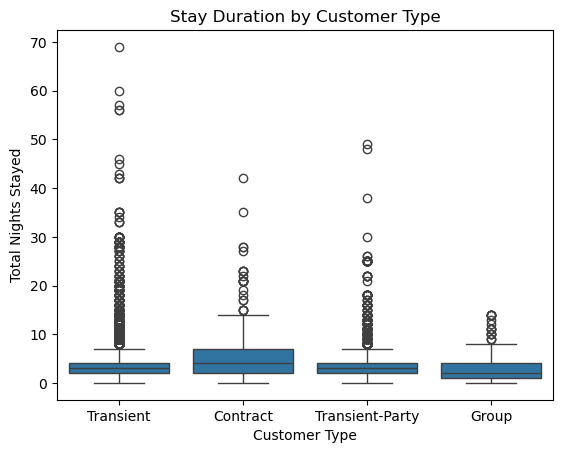


Cancellation Rates by Customer Type:
 customer_type
Contract           0.309448
Group              0.096661
Transient          0.407545
Transient-Party    0.254747
Name: is_canceled, dtype: float64

Room Preferences by Customer Type:
 reserved_room_type        A      B      C        D       E       F       G  \
customer_type                                                                
Contract             2867.0   75.0   10.0    843.0   177.0   101.0     1.0   
Group                 364.0    6.0    5.0    142.0    32.0    10.0     7.0   
Transient           60833.0  634.0  721.0  16267.0  5408.0  2438.0  1542.0   
Transient-Party     21777.0  399.0   82.0   1776.0   735.0   120.0   106.0   

reserved_room_type      H    L     P  
customer_type                         
Contract              1.0  NaN   NaN  
Group                 2.0  NaN   1.0  
Transient           437.0  6.0  11.0  
Transient-Party      22.0  NaN   NaN  


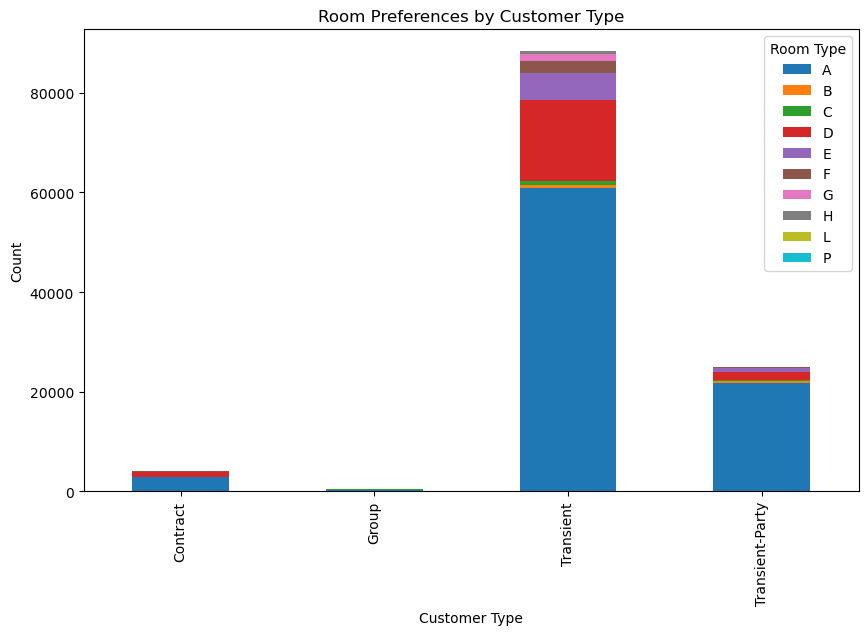

In [244]:
#7 .
# Compute new features
df['group_size'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Stay duration by customer type
sns.boxplot(x=df['customer_type'], y=df['total_nights'])
plt.title("Stay Duration by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Nights Stayed")
plt.show()

# Cancellation rates by customer type
cancel_rates = df.groupby('customer_type')['is_canceled'].mean()
print("\nCancellation Rates by Customer Type:\n", cancel_rates)

# Room preferences by customer type
room_prefs = df.groupby('customer_type')['reserved_room_type'].value_counts().unstack()
print("\nRoom Preferences by Customer Type:\n", room_prefs)

# Visualizing room preferences
room_prefs.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Room Preferences by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.legend(title="Room Type")
plt.show()


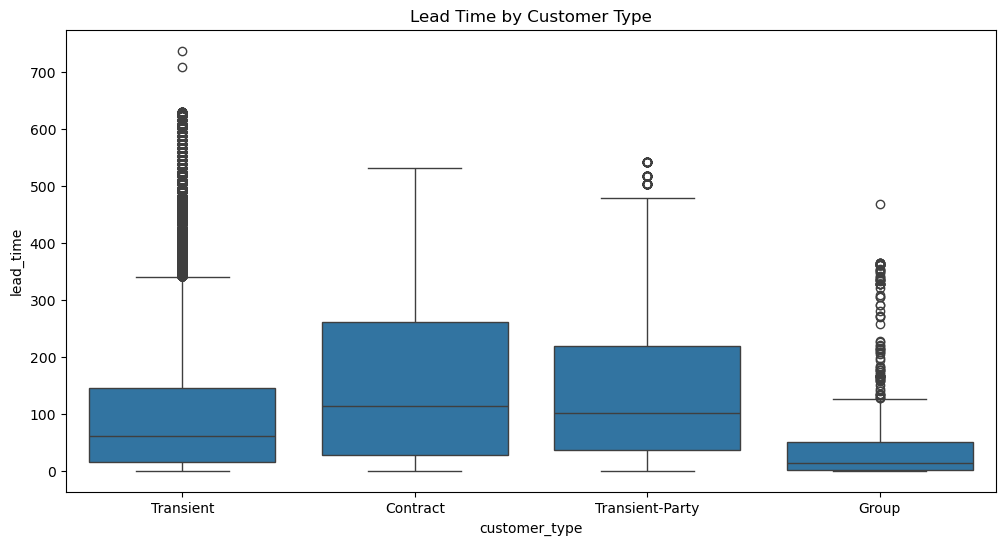

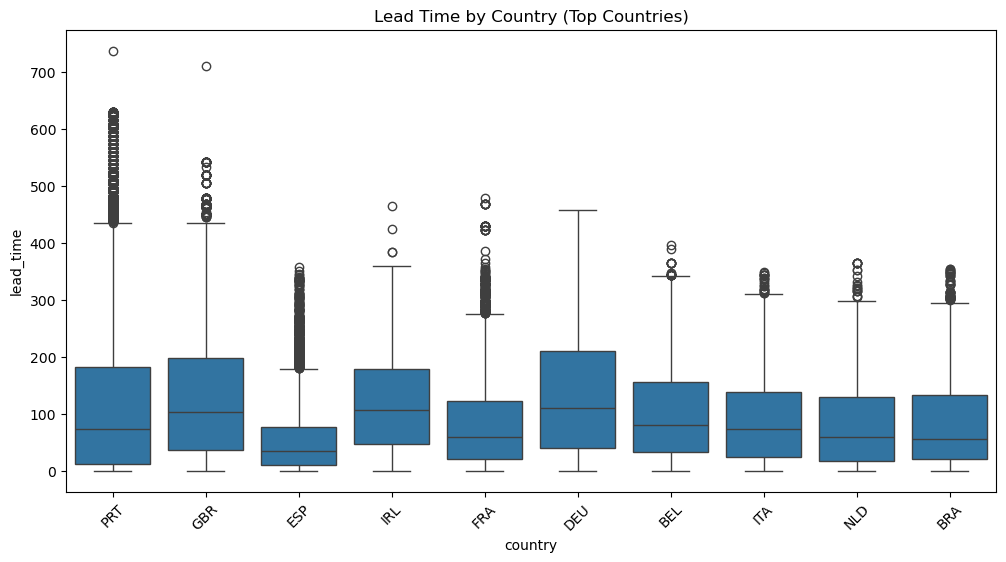

In [246]:
# 8.
plt.figure(figsize=(12,6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time by Customer Type')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='lead_time', data=df[df['country'].isin(top_countries)])
plt.title('Lead Time by Country (Top Countries)')
plt.xticks(rotation=45)
plt.show()

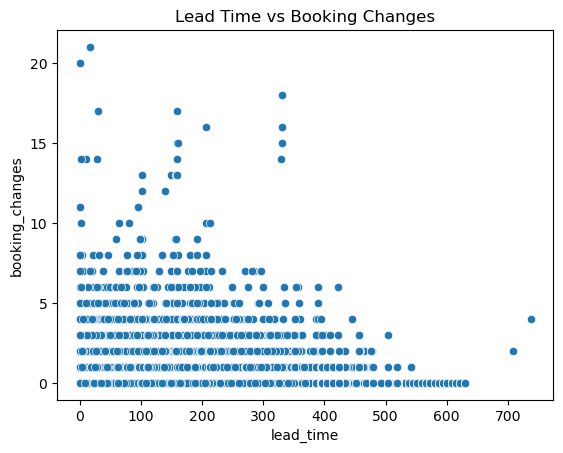

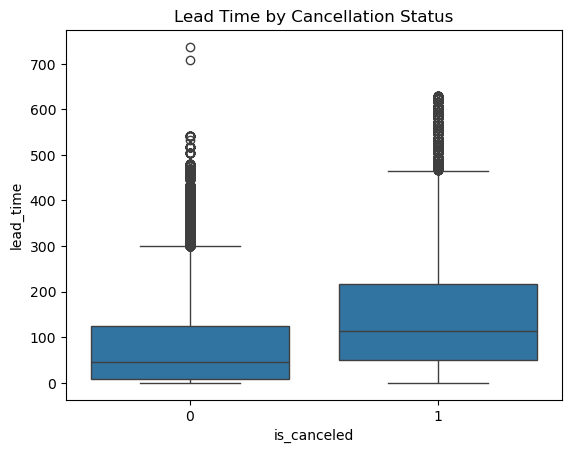

In [248]:
# 9.
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
plt.title('Lead Time vs Booking Changes')
plt.show()

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time by Cancellation Status')
plt.show()

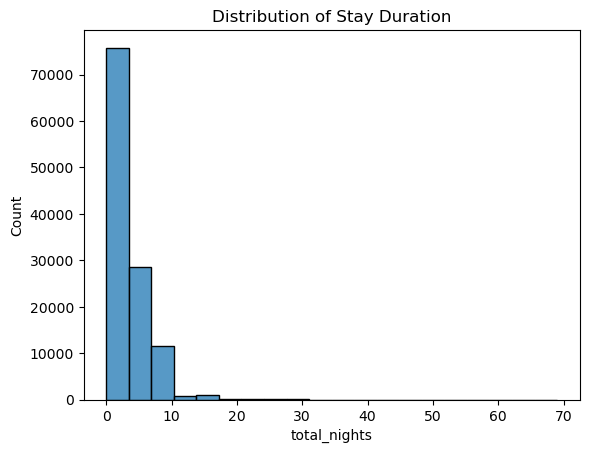

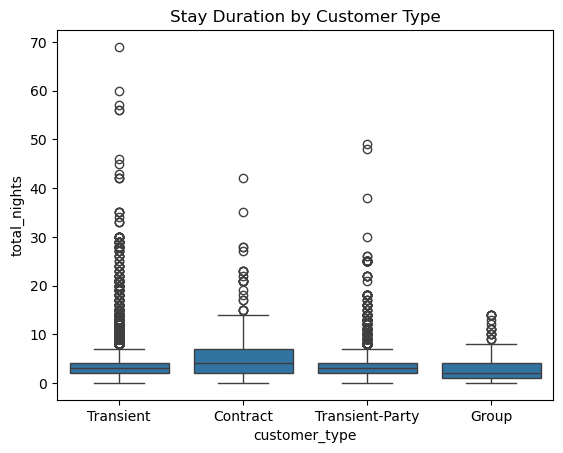

In [250]:
# 10.
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.histplot(df['total_nights'], bins=20)
plt.title('Distribution of Stay Duration')
plt.show()

sns.boxplot(x='customer_type', y='total_nights', data=df)
plt.title('Stay Duration by Customer Type')
plt.show()

In [254]:
# 11.  as Q4

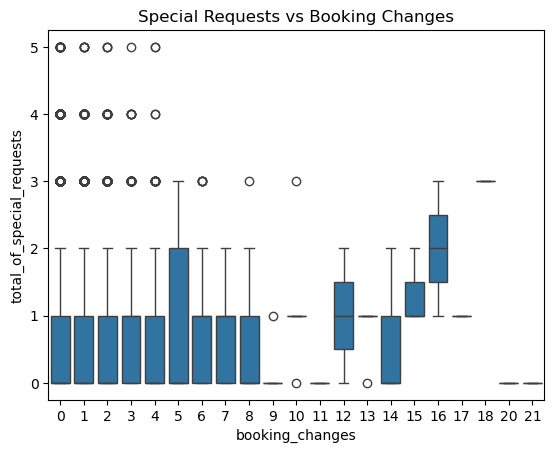

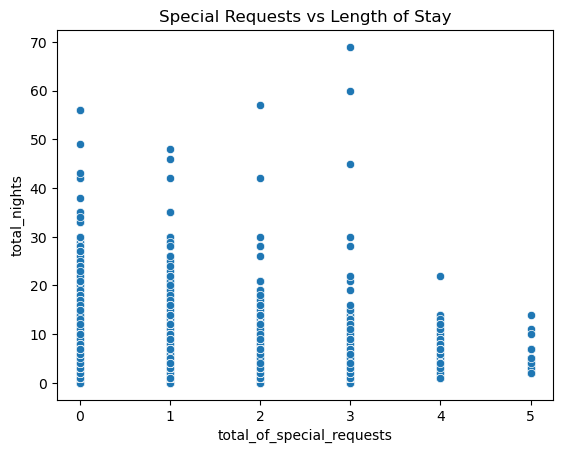

In [252]:
# 12.
sns.boxplot(x='booking_changes', y='total_of_special_requests', data=df)
plt.title('Special Requests vs Booking Changes')
plt.show()

sns.scatterplot(x='total_of_special_requests', y='total_nights', data=df)
plt.title('Special Requests vs Length of Stay')
plt.show()

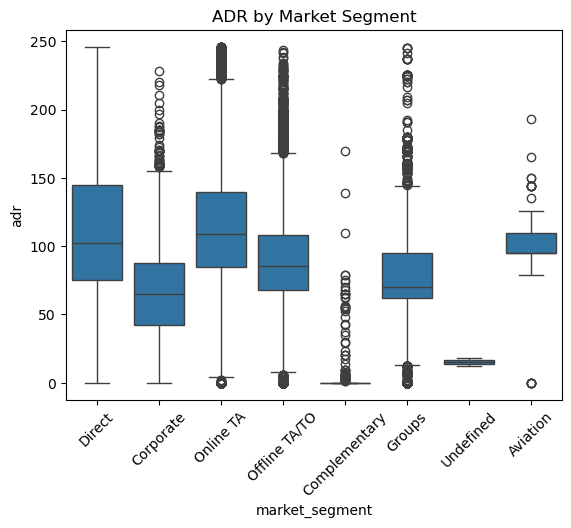

Cancellation Rate by Distribution Channel:
 distribution_channel
Corporate    0.220557
Direct       0.173424
GDS          0.191710
TA/TO        0.409819
Undefined    0.800000
Name: is_canceled, dtype: float64


In [256]:
# 13.
sns.boxplot(x='market_segment', y='adr', data=df)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

booking_consistency = df.groupby('distribution_channel')['is_canceled'].mean()
print("Cancellation Rate by Distribution Channel:\n", booking_consistency)

In [258]:
# 14.as Q 1

customer_type
Contract           451.246074
Group              239.736538
Transient          369.508855
Transient-Party    257.880092
Name: revenue, dtype: float64


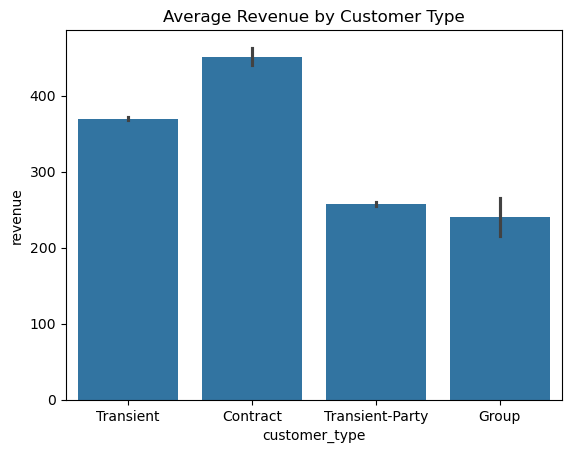

In [260]:
# 15.
df['revenue'] = df['adr'] * df['total_nights']
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean()
print(revenue_by_customer_type)

sns.barplot(x='customer_type', y='revenue', data=df)
plt.title('Average Revenue by Customer Type')
plt.show()

In [ ]:
# 16. as Q1 . Q3

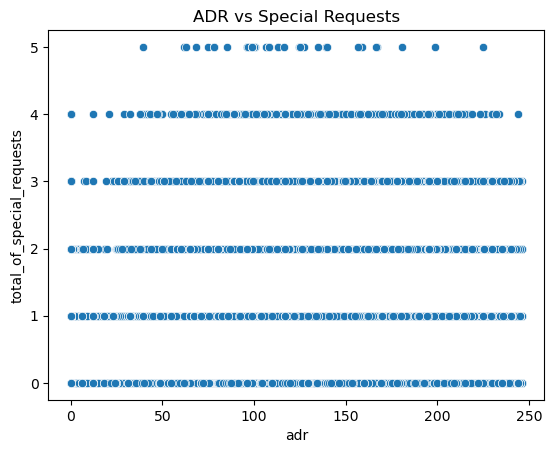

In [266]:
# 17.
sns.scatterplot(x='adr', y='total_of_special_requests', data=df)
plt.title('ADR vs Special Requests')
plt.show()

In [ ]:
# 18. as Q3 , Q7

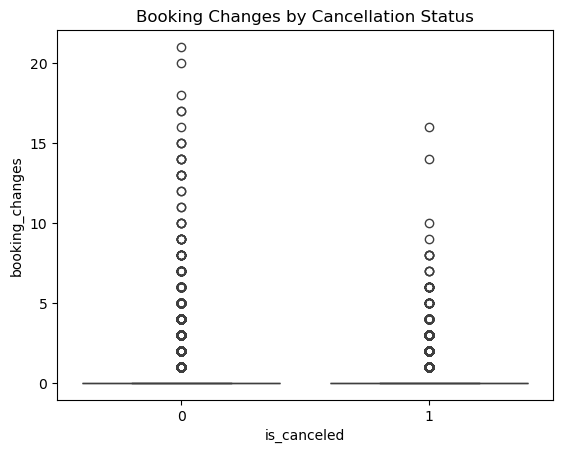

In [269]:
# 19.
sns.boxplot(x='is_canceled', y='booking_changes', data=df)
plt.title('Booking Changes by Cancellation Status')
plt.show()